
2


Compare the configurations of various Perceptron models for real world problems


Explanation:
Data Preparation: The Iris dataset is loaded, standardized, and split into training and testing sets.
Model Definition: A simple feedforward neural network with one hidden layer is defined.
Training: The model is trained using SGD optimizer and CrossEntropy loss for 100 epochs.
Loss Visualization: The training loss is plotted using matplotlib.
Testing: The model's accuracy on the test data is calculated and displayed.
Output:
Loss Graph: The graph of training loss over epochs will be displayed.
Accuracy: The accuracy of the model on the test data will be printed in the console.
Run the code to see the output and visualize the loss graph. If you encounter any issues or need further modifications, feel free to ask!








Epoch [10/100], Loss: 1.3080
Epoch [20/100], Loss: 1.2532
Epoch [30/100], Loss: 1.2064
Epoch [40/100], Loss: 1.1660
Epoch [50/100], Loss: 1.1305
Epoch [60/100], Loss: 1.0989
Epoch [70/100], Loss: 1.0703
Epoch [80/100], Loss: 1.0442
Epoch [90/100], Loss: 1.0202
Epoch [100/100], Loss: 0.9978


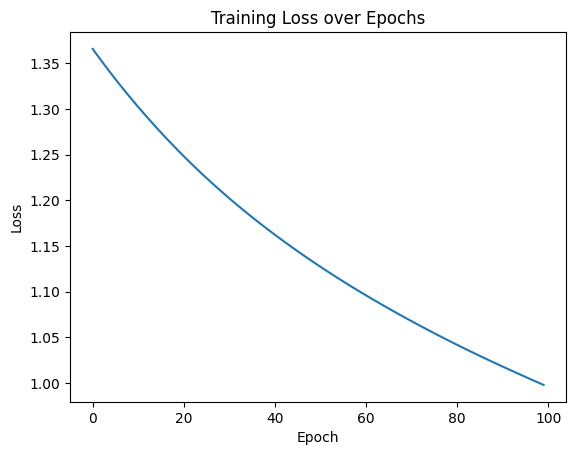

Accuracy on test data: 0.4222


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Define the neural network model
class FeedforwardNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Hyperparameters
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = len(iris.target_names)
learning_rate = 0.01
num_epochs = 100

# Initialize the model, loss function and optimizer
model = FeedforwardNN(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training the model
losses = []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plotting the loss graph
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

# Testing the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs.data, 1)
    accuracy = accuracy_score(y_test, predicted)
    print(f'Accuracy on test data: {accuracy:.4f}')
